# 취합된 데이터 파일 확인

In [67]:
import pickle
with open ("./dacon_total_df_20240503_02.pkl", "rb") as file:
    total_df = pickle.load(file)

In [19]:
# pd.set_option('display.max_columns', None)

In [68]:
total_df.columns

Index(['Order_id', 'Product_id', 'Seller_id', 'Order_purchase_year',
       'Order_purchase_month', 'Review_id', 'Review_score',
       'Review_creation_date', 'Review_answer_timestamp', 'Price',
       'Freight_value', 'Customer_id', 'Order_status',
       'Order_purchase_timestamp', 'Order_delivered_carrier_date',
       'Order_delivered_customer_date', 'Order_estimated_delivery_date',
       'Payment_type', 'Payment_installments', 'Product_category_name',
       'Customer_unique_id', 'Customer_zipcode_prefix', 'Customer_city',
       'Customer_state', 'Seller_zipcode_prefix', 'Seller_city',
       'Seller_state', 'order_count', 'Order_purchase_quarter', '순이익', '매출액'],
      dtype='object')

In [69]:
total_df.head(1)

,Order_id,Product_id,Seller_id,Order_purchase_year,Order_purchase_month,Review_id,Review_score,Review_creation_date,Review_answer_timestamp,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,Order_purchase_quarter,순이익,매출액
355,ORDER_00329,PRODUCT_07734,SELLER_0146,2017,10,REVIEW_65349,1,2017-10-21,2017-10-22 10:10:28,75.0,20.58,CUSTOMER_06208,delivered,2017-10-05 07:31:49,2017-10-10 02:46:24,2017-10-16 14:36:00,2017-12-07,boleto,1,computers_accessories,CUSTOMER_Unique_06197,50090,recife,PE,30190,belo horizonte,MG,1,4,75.0,95.58


In [70]:
tmp = total_df.groupby(['Customer_unique_id'])[['order_count', 'Freight_value', 'Price']].sum()

In [71]:
tmp.head()

,order_count,Freight_value,Price
Customer_unique_id,,,
CUSTOMER_Unique_00000,1,21.88,124.99
CUSTOMER_Unique_00001,1,46.48,289.00
CUSTOMER_Unique_00002,1,17.79,139.94
CUSTOMER_Unique_00003,1,23.36,149.94
CUSTOMER_Unique_00004,2,59.36,506.52


In [99]:
temp = total_df[total_df.Customer_unique_id=="CUSTOMER_Unique_60785"]

In [100]:
temp_list=sorted(temp.Order_purchase_timestamp)

In [104]:
temp_list

[Timestamp('2018-09-04 11:26:38'), Timestamp('2018-10-02 10:56:33')]

In [101]:
len(temp_list)

2

In [105]:
date_min = sorted(temp.Order_purchase_timestamp)[0]

In [106]:
date_max = sorted(temp.Order_purchase_timestamp)[len(temp_list)-1]

In [107]:
date_max

Timestamp('2018-10-02 10:56:33')

In [108]:
date_min

Timestamp('2018-09-04 11:26:38')

In [77]:
max_order_timestamps = date_max

In [85]:
# total_df['Order_purchase_timestamp'] = pd.to_datetime(total_df['Order_purchase_timestamp'])

In [79]:
temp['latest_order_timestamp'] = max_order_timestamps

In [80]:
temp

,Order_id,Product_id,Seller_id,Order_purchase_year,Order_purchase_month,Review_id,Review_score,Review_creation_date,Review_answer_timestamp,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,Order_purchase_quarter,순이익,매출액,latest_order_timestamp
65411,ORDER_61678,PRODUCT_24575,SELLER_2293,2018,9,REVIEW_86796,5,2018-09-29,2018-10-01 21:52:53,259.90,22.31,CUSTOMER_00004,delivered,2018-09-14 18:14:31,2018-09-18 21:27:40,2018-09-28 17:32:43,2018-10-04,debit_card,1,sports_leisure,CUSTOMER_Unique_00004,89254,jaragua do sul,SC,5141,pirituba,SP,1,3,259.90,282.21,2018-10-15 12:44:13
89213,ORDER_84093,PRODUCT_23082,SELLER_0807,2018,10,REVIEW_81709,5,2018-10-26,2018-10-29 21:11:24,246.62,37.05,CUSTOMER_59129,delivered,2018-10-15 12:44:13,2018-10-17 20:05:34,2018-10-25 17:00:04,2018-11-08,credit_card,1,telephony,CUSTOMER_Unique_00004,89253,jaragua do sul,SC,42738,lauro de freitas,BA,1,4,246.62,283.67,2018-10-15 12:44:13


In [83]:

min_order_timestamps = date_min
# latest_order_timestamp 열에 각 고객별 최근 주문 일시를 할당합니다.
temp['first_order_timestamp'] = min_order_timestamps

In [84]:
temp

,Order_id,Product_id,Seller_id,Order_purchase_year,Order_purchase_month,Review_id,Review_score,Review_creation_date,Review_answer_timestamp,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,Order_purchase_quarter,순이익,매출액,latest_order_timestamp,first_order_timestamp
65411,ORDER_61678,PRODUCT_24575,SELLER_2293,2018,9,REVIEW_86796,5,2018-09-29,2018-10-01 21:52:53,259.90,22.31,CUSTOMER_00004,delivered,2018-09-14 18:14:31,2018-09-18 21:27:40,2018-09-28 17:32:43,2018-10-04,debit_card,1,sports_leisure,CUSTOMER_Unique_00004,89254,jaragua do sul,SC,5141,pirituba,SP,1,3,259.90,282.21,2018-10-15 12:44:13,2018-09-14 18:14:31
89213,ORDER_84093,PRODUCT_23082,SELLER_0807,2018,10,REVIEW_81709,5,2018-10-26,2018-10-29 21:11:24,246.62,37.05,CUSTOMER_59129,delivered,2018-10-15 12:44:13,2018-10-17 20:05:34,2018-10-25 17:00:04,2018-11-08,credit_card,1,telephony,CUSTOMER_Unique_00004,89253,jaragua do sul,SC,42738,lauro de freitas,BA,1,4,246.62,283.67,2018-10-15 12:44:13,2018-09-14 18:14:31


In [134]:
# 최근 구매 처음 구매
#total_df
# unique아이디 
total_df_unique_id_list=total_df.Customer_unique_id.tolist()

In [135]:
type(total_df_unique_id_list)

list

In [136]:
total_df_unique_id_list[1]

'CUSTOMER_Unique_74990'

In [137]:
total_df[total_df.Customer_unique_id==total_df_unique_id_list[1]]

,Order_id,Product_id,Seller_id,Order_purchase_year,Order_purchase_month,Review_id,Review_score,Review_creation_date,Review_answer_timestamp,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,Order_purchase_quarter,순이익,매출액,latest_order_timestamp,first_order_timestamp
666,ORDER_00616,PRODUCT_04278,SELLER_0914,2017,10,REVIEW_21396,1,2017-10-22,2017-10-24 23:33:19,294.9,20.34,CUSTOMER_77212,delivered,2017-10-05 15:08:00,2017-10-10 15:44:27,2017-10-13 15:44:27,2017-11-29,credit_card,10,automotive,CUSTOMER_Unique_74990,13610,leme,SP,86035,londrina,PR,1,4,294.9,315.24,NaT,NaT


In [141]:
from tqdm import tqdm
for i in tqdm(range(len(total_df_unique_id_list))):

    
    temp = total_df[total_df.Customer_unique_id==total_df_unique_id_list[i]]
    # print(total_df_unique_id_list[i])
    # print(temp.Order_purchase_timestamp)
    # break
    # temp_list = 
    total_df.loc[total_df.Customer_unique_id==total_df_unique_id_list[i], "latest_order_timestamp"] =sorted(temp.Order_purchase_timestamp)[len(sorted(temp.Order_purchase_timestamp))-1]
    total_df.loc[total_df.Customer_unique_id==total_df_unique_id_list[i], "first_order_timestamp"] = sorted(temp.Order_purchase_timestamp)[0]
    

    # break

100%|█████████████████████████████████████████████████████████████████████████████| 90646/90646 [29:31<00:00, 51.17it/s]


In [88]:
# total_df_unique_id_list`

In [149]:
total_new_df = total_df[total_df.latest_order_timestamp != total_df.first_order_timestamp].copy()

In [158]:
temp_list = sorted(total_new_df.Customer_unique_id.value_counts())

In [159]:
sorted(total_new_df.Customer_unique_id.value_counts())[len(temp_list)-1]
# 2개에서 13개

13

In [152]:
# total_df[total_df.Customer_unique_id=="CUSTOMER_Unique_54276"]

In [153]:
# total_new_df.iloc[0]

In [160]:
# '재구매여부' 열 추가
total_df['재구매여부'] = total_df['order_count'].apply(lambda x: 'Y' if x >= 2 else 'N')

In [163]:
# total_df.head(20)

In [164]:
# '구매간격' 열 추가
total_df['latest_order_timestamp'] = pd.to_datetime(total_df['latest_order_timestamp'])
total_df['first_order_timestamp'] = pd.to_datetime(total_df['first_order_timestamp'])

In [165]:
total_df.head(10)

,Order_id,Product_id,Seller_id,Order_purchase_year,Order_purchase_month,Review_id,Review_score,Review_creation_date,Review_answer_timestamp,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,Order_purchase_quarter,순이익,매출액,latest_order_timestamp,first_order_timestamp,재구매여부
355,ORDER_00329,PRODUCT_07734,SELLER_0146,2017,10,REVIEW_65349,1,2017-10-21,2017-10-22 10:10:28,75.0,20.58,CUSTOMER_06208,delivered,2017-10-05 07:31:49,2017-10-10 02:46:24,2017-10-16 14:36:00,2017-12-07,boleto,1,computers_accessories,CUSTOMER_Unique_06197,50090,recife,PE,30190,belo horizonte,MG,1,4,75.0,95.58,2017-10-05 07:31:49,2017-10-05 07:31:49,N
666,ORDER_00616,PRODUCT_04278,SELLER_0914,2017,10,REVIEW_21396,1,2017-10-22,2017-10-24 23:33:19,294.9,20.34,CUSTOMER_77212,delivered,2017-10-05 15:08:00,2017-10-10 15:44:27,2017-10-13 15:44:27,2017-11-29,credit_card,10,automotive,CUSTOMER_Unique_74990,13610,leme,SP,86035,londrina,PR,1,4,294.9,315.24,2017-10-05 15:08:00,2017-10-05 15:08:00,N
1321,ORDER_01235,PRODUCT_23369,SELLER_1445,2017,10,REVIEW_50469,3,2017-10-25,2017-10-26 23:52:15,93.9,17.61,CUSTOMER_36496,delivered,2017-10-04 14:13:22,2017-10-08 14:46:49,2017-10-11 14:46:49,2017-11-30,credit_card,4,furniture_decor,CUSTOMER_Unique_35969,21853,rio de janeiro,RJ,87900,loanda,PR,1,4,93.9,111.51,2017-10-04 14:13:22,2017-10-04 14:13:22,N
1385,ORDER_01293,PRODUCT_04377,SELLER_2603,2017,10,REVIEW_75101,1,2017-10-27,2017-10-27 10:41:59,44.9,15.63,CUSTOMER_15399,delivered,2017-10-07 00:54:40,2017-10-25 11:35:52,2017-10-27 17:32:07,2017-12-01,boleto,1,perfumery,CUSTOMER_Unique_15296,21220,rio de janeiro,RJ,17510,marilia,SP,3,4,134.7,181.59,2017-10-07 00:54:40,2017-10-07 00:54:40,Y
2230,ORDER_02078,PRODUCT_21531,SELLER_2660,2017,10,REVIEW_58071,4,2017-10-28,2018-01-08 15:09:32,39.9,14.52,CUSTOMER_77880,delivered,2017-10-05 13:12:43,2017-10-21 16:34:58,2017-10-27 12:33:29,2017-11-29,credit_card,10,telephony,CUSTOMER_Unique_75617,37704,pocos de caldas,MG,2969,sao paulo,SP,2,4,79.8,108.84,2017-10-05 13:12:43,2017-10-05 13:12:43,Y
2956,ORDER_02771,PRODUCT_25882,SELLER_1247,2017,10,REVIEW_68946,4,2017-11-01,2017-11-02 23:08:57,128.9,21.01,CUSTOMER_65211,delivered,2017-10-05 17:11:49,2017-10-30 15:14:54,2017-10-31 21:41:43,2017-11-29,credit_card,2,toys,CUSTOMER_Unique_63620,32400,ibirite,MG,18530,tiete,SP,1,4,128.9,149.91,2017-10-05 17:11:49,2017-10-05 17:11:49,N
3575,ORDER_03375,PRODUCT_26886,SELLER_0772,2017,10,REVIEW_57390,5,2017-11-18,2017-11-21 11:01:11,169.9,14.97,CUSTOMER_47436,delivered,2017-10-05 12:44:09,2017-11-17 11:54:02,2017-11-17 19:53:49,2017-11-25,credit_card,5,bed_bath_table,CUSTOMER_Unique_46584,31870,belo horizonte,MG,31255,belo horizonte,MG,1,4,169.9,184.87,2017-10-05 12:44:09,2017-10-05 12:44:09,N
4188,ORDER_03948,PRODUCT_19710,SELLER_2044,2017,10,REVIEW_10324,5,2017-10-18,2017-12-06 20:48:13,22.9,15.46,CUSTOMER_54719,delivered,2017-10-05 22:39:46,2017-10-10 16:03:33,2017-10-13 16:03:33,2017-11-25,credit_card,1,furniture_decor,CUSTOMER_Unique_53614,12320,jacarei,SP,17051,bauru,SP,1,4,22.9,38.36,2017-10-05 22:39:46,2017-10-05 22:39:46,N
4227,ORDER_03987,PRODUCT_27124,SELLER_1264,2017,10,REVIEW_79141,5,2017-10-26,2017-10-26 12:50:15,649.0,169.12,CUSTOMER_72038,delivered,2017-10-05 15:17:57,2017-10-15 12:39:28,2017-10-25 20:28:33,2017-12-09,credit_card,10,sports_leisure,CUSTOMER_Unique_70098,53635,igarassu,PE,3194,sao paulo,SP,1,4,649.0,818.12,2017-10-05 15:17:57,2017-10-05 15:17:57,N
4309,ORDER_04066,PRODUCT_16635,SELLER_2117,2017,10,REVIEW_01765,5,2017-11-01,2017-11-02 10:26:40,54.9,14.73,CUSTOMER_55408,delivered,2017-10-05 21:10:56,2017-10-30 13:27:40,2017-10-31 13:27:40,2017-11-29,credit_card,3,fashion_womens_clothing,CUSTOMER_Unique_54276,35730,capim branco,MG,5

In [166]:

total_df['구매간격'] = (total_df['latest_order_timestamp'] - total_df['first_order_timestamp']).dt.days

In [169]:
# total_df.head(10)

In [170]:
# '구매주기' 열 추가
total_df['구매주기'] = total_df.apply\
(lambda row: 0 if (row['order_count'] - 1 == 0) or (row['구매간격'] == 0) else row['구매간격'] / (row['order_count'] - 1), axis=1)

In [175]:
total_df.구매주기.value_counts()

구매주기
0.000000      90276
7.000000          9
0.500000          7
14.000000         6
32.000000         5
              ...  
16.333333         1
91.000000         1
0.214286          1
155.000000        1
199.000000        1
Name: count, Length: 219, dtype: int64

In [177]:
total_df.shape

(90646, 36)

In [176]:
total_df[total_df['구매주기'] > 0].shape

(370, 36)

In [134]:
total_df[total_df['Customer_unique_id'] == 'CUSTOMER_Unique_85216']

,Review_id,Order_id,Review_score,Review_creation_date,Review_answer_timestamp,Product_id,Seller_id,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,first_order_timestamp,latest_order_timestamp,재구매여부,구매간격,구매주기
72894,REVIEW_67953,ORDER_84288,5,2019-02-08 00:00:00,2019-02-10 20:07:29,PRODUCT_27785,SELLER_1049,29.9,14.1,CUSTOMER_88065,delivered,2019-01-24 02:22:12,2019-01-26 21:28:37,2019-02-07 17:42:55,2019-02-22,credit_card,8,electronics,CUSTOMER_Unique_85216,26112,belford roxo,RJ,5588,sao paulo,SP,2,2019-01-24 02:22:12,2019-01-24 02:22:12,Y,0,0.0
72895,REVIEW_67953,ORDER_84288,5,2019-02-08 00:00:00,2019-02-10 20:07:29,PRODUCT_27785,SELLER_1049,29.9,14.1,CUSTOMER_88065,delivered,2019-01-24 02:22:12,2019-01-26 21:28:37,2019-02-07 17:42:55,2019-02-22,voucher,1,electronics,CUSTOMER_Unique_85216,26112,belford roxo,RJ,5588,sao paulo,SP,2,2019-01-24 02:22:12,2019-01-24 02:22:12,Y,0,0.0


In [135]:
total_df[total_df['order_count'] >= 2].sort_values(by='Customer_unique_id')

,Review_id,Order_id,Review_score,Review_creation_date,Review_answer_timestamp,Product_id,Seller_id,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,first_order_timestamp,latest_order_timestamp,재구매여부,구매간격,구매주기
64175,REVIEW_59807,ORDER_50057,1,2018-10-26 00:00:00,2018-10-27 09:19:26,PRODUCT_04082,SELLER_0417,59.90,17.67,CUSTOMER_00019,delivered,2018-10-15 11:08:48,2018-10-16 21:36:29,2018-10-25 22:30:58,2018-11-06,credit_card,2,garden_tools,CUSTOMER_Unique_00019,74914,aparecida de goiania,GO,15025,sao jose do rio preto,SP,3,2018-10-15 11:08:48,2018-10-15 11:08:48,Y,0,0.0
24147,REVIEW_22414,ORDER_08495,2,2019-04-27 00:00:00,2019-04-27 20:35:22,PRODUCT_14758,SELLER_1822,11.99,13.47,CUSTOMER_00042,delivered,2019-04-18 14:18:09,2019-04-20 00:47:44,2019-04-26 16:26:38,2019-05-11,boleto,1,furniture_decor,CUSTOMER_Unique_00042,30320,belo horizonte,MG,38408,uberlandia,MG,2,2019-04-18 14:18:09,2019-04-18 14:18:09,Y,0,0.0
24097,REVIEW_22368,ORDER_33608,5,2018-07-22 00:00:00,2018-07-24 11:19:02,PRODUCT_27916,SELLER_1192,99.97,16.14,CUSTOMER_00052,delivered,2018-07-11 09:36:46,2018-07-11 19:42:28,2018-07-21 20:06:22,2018-08-04,credit_card,5,bed_bath_table,CUSTOMER_Unique_00052,75388,trindade,GO,32677,betim,MG,2,2018-07-11 09:36:46,2018-07-11 09:36:46,Y,0,0.0
35447,REVIEW_32926,ORDER_37143,1,2019-06-14 00:00:00,2019-06-18 18:14:36,PRODUCT_02080,SELLER_1933,12.09,18.23,CUSTOMER_00053,delivered,2019-06-06 16:53:30,2019-06-08 14:46:00,2019-06-13 20:48:25,2019-07-17,credit_card,3,home_utilities,CUSTOMER_Unique_00053,85808,cascavel,PR,2030,sao paulo,SP,5,2019-06-06 16:53:30,2019-06-06 16:53:30,Y,0,0.0
73279,REVIEW_68307,ORDER_42637,4,2018-04-05 00:00:00,2018-04-08 23:14:41,PRODUCT_19338,SELLER_0525,14.99,15.56,CUSTOMER_00068,delivered,2018-03-23 11:07:12,2018-03-24 10:36:22,2018-04-04 14:58:07,2018-04-13,credit_card,4,drinks,CUSTOMER_Unique_00068,5890,sao paulo,SP,37706,pocos de caldas,MG,2,2018-03-23 11:07:12,2018-03-23 11:07:12,Y,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45657,REVIEW_42458,ORDER_13012,1,2018-12-09 00:00:00,2018-12-11 17:51:56,PRODUCT_09019,SELLER_2592,49.00,11.38,CUSTOMER_88049,delivered,2018-11-14 18:25:42,2018-11-23 22:10:31,2018-12-08 00:18:54,2018-12-14,credit_card,2,computers_accessories,CUSTOMER_Unique_85201,59082,natal,RN,12327,jacarei,SP,3,2018-11-14 18:25:42,2018-11-14 18:25:42,Y,0,0.0
90118,REVIEW_84161,ORDER_51621,5,2018-10-31 00:00:00,2018-10-31 14:45:02,PRODUCT_11899,SELLER_2669,47.99,12.69,CUSTOMER_88053,delivered,2018-10-24 10:44:15,2018-10-25 20:37:04,2018-10-30 21:16:59,2018-11-10,boleto,1,bed_bath_table,CUSTOMER_Unique_85205,15063,sao jose do rio preto,SP,14940,ibitinga,SP,2,2018-10-24 10:44:15,2018-10-24 10:44:15,Y,0,0.0
43497,REVIEW_40449,ORDER_07342,1,2019-03-16 00:00:00,2019-03-16 12:32:19,PRODUCT_10765,SELLER_1059,79.99,30.40,CUSTOMER_88064,delivered,2019-01-30 15:28:21,2019-02-16 16:28:33,2019-03-16 20:03:53,2019-03-13,credit_card,6,office_furniture,CUSTOMER_Unique_85215,82410,curitiba,PR,8577,itaquaquecetuba,SP,6,2019-01-30 15:28:21,2019-01-30 15:28:21,Y,0,0.0
72895,REVIEW_67953,ORDER_84288,5,2019-02-08 00:00:00,2019-02-10 20:07:29,PRODUCT_27785,SELLER_1049,29.90,14.10,CUSTOMER_88065,delivered,2019-01-24 02:22:12,2019-01-26 21:28:37,2019-02-07 17:42:55,2019-02-22,voucher,1,electronics,CUSTOMER_Unique_85216,26112,belford roxo,RJ,5588,sao paulo,SP,2,2019-01-24 02:22:12,2019-01-24 02:22:12,Y,0,0.0


In [146]:
tmp2 = total_df.groupby(['Customer_unique_id'], as_index=False)[['order_count', 'Freight_value', 'Price']].sum()

In [149]:
#tmp3 = total_df.groupby(['Customer_unique_id'])[['재구매여부', '구매주기']]
tmp3 = total_df[['Customer_unique_id','재구매여부', '구매주기']]

In [152]:
reorder = pd.merge(tmp2, tmp3, on='Customer_unique_id', how='left')
reorder

,Customer_unique_id,order_count,Freight_value,Price,재구매여부,구매주기
0,CUSTOMER_Unique_00000,1,21.88,124.99,N,0.0
1,CUSTOMER_Unique_00001,1,46.48,289.00,N,0.0
2,CUSTOMER_Unique_00002,1,17.79,139.94,N,0.0
3,CUSTOMER_Unique_00003,1,23.36,149.94,N,0.0
4,CUSTOMER_Unique_00004,2,59.36,506.52,N,0.0
...,...,...,...,...,...,...
93476,CUSTOMER_Unique_85234,1,13.88,74.90,N,0.0
93477,CUSTOMER_Unique_85235,1,14.16,114.90,N,0.0
93478,CUSTOMER_Unique_85236,1,19.04,37.00,N,0.0
93479,CUSTOMER_Unique_85237,1,22.07,689.00,N,0.0


In [158]:
# '구매주기_구간' 열 추가
reorder_filtered = reorder[reorder['구매주기'] > 0]

reorder_filtered['구매주기_구간'] = pd.cut(reorder_filtered['구매주기'], \
                    bins=[-float('inf'), 7, 14, 21, 28, float('inf')], \
                    labels=['7일 이내', '14일 이내', '21일 이내', '28일 이내', '29일 이상'], right=False)
reorder_filtered

,Customer_unique_id,order_count,Freight_value,Price,재구매여부,구매주기,구매주기_구간
218,CUSTOMER_Unique_00188,4,26.87,118.90,Y,28.0,29일 이상
219,CUSTOMER_Unique_00188,4,26.87,118.90,Y,28.0,29일 이상
262,CUSTOMER_Unique_00227,4,22.76,109.90,Y,5.5,7일 이내
483,CUSTOMER_Unique_00414,3,47.23,105.50,Y,32.0,29일 이상
548,CUSTOMER_Unique_00470,5,99.25,578.32,Y,207.0,29일 이상
...,...,...,...,...,...,...,...
84483,CUSTOMER_Unique_76745,3,22.49,74.70,Y,41.0,29일 이상
85230,CUSTOMER_Unique_77444,3,34.90,126.46,Y,176.0,29일 이상
87495,CUSTOMER_Unique_79562,4,23.19,330.32,Y,20.0,21일 이내
90090,CUSTOMER_Unique_82027,4,22.90,163.90,Y,120.0,29일 이상


In [173]:
re_df = reorder_filtered.groupby(['구매주기_구간'], as_index=False)[['Customer_unique_id']].count()

In [175]:
re_df2 = reorder_filtered.groupby(['구매주기_구간'], as_index=False)[['order_count', 'Freight_value', 'Price']].sum()
re_df2

,구매주기_구간,order_count,Freight_value,Price
0,7일 이내,268,2064.68,10571.68
1,14일 이내,134,1287.13,7318.08
2,21일 이내,204,1760.99,5508.40
3,28일 이내,130,891.59,3933.92
4,29일 이상,1373,14743.67,69707.31


In [178]:
re_df3 = pd.merge(re_df, re_df2, on='구매주기_구간', how='inner')
re_df3

,구매주기_구간,Customer_unique_id,order_count,Freight_value,Price
0,7일 이내,42,268,2064.68,10571.68
1,14일 이내,27,134,1287.13,7318.08
2,21일 이내,31,204,1760.99,5508.40
3,28일 이내,22,130,891.59,3933.92
4,29일 이상,260,1373,14743.67,69707.31


In [217]:
re_df3['Payment_value'] = re_df3['Freight_value'] + re_df3['Price']
re_df3['구매당순이익'] = round(re_df3['Price'] / re_df3['order_count'], 2)
re_df3['구매당운송비'] = round(re_df3['Freight_value'] / re_df3['order_count'], 2)
re_df3['고객당순이익'] = round(re_df3['Price'] / re_df3['Customer_unique_id'], 0)
re_df3['고객당구매수'] = round(re_df3['order_count'] / re_df3['Customer_unique_id'], 2)
re_df3['고객당매출액'] = round(re_df3['Payment_value'] / re_df3['Customer_unique_id'], 0)

In [219]:
re_df3.sort_values(by='고객당순이익', ascending=False)

,구매주기_구간,Customer_unique_id,order_count,Freight_value,Price,구매당순이익,구매당운송비,고객당순이익,고객당구매수,고객당운송비,Payment_value,고객당매출액
1,14일 이내,27,134,1287.13,7318.08,54.61,9.61,271.0,4.96,47.671481,8605.21,319.0
4,29일 이상,260,1373,14743.67,69707.31,50.77,10.74,268.0,5.28,56.706423,84450.98,325.0
0,7일 이내,42,268,2064.68,10571.68,39.45,7.70,252.0,6.38,49.159048,12636.36,301.0
3,28일 이내,22,130,891.59,3933.92,30.26,6.86,179.0,5.91,40.526818,4825.51,219.0
2,21일 이내,31,204,1760.99,5508.40,27.00,8.63,178.0,6.58,56.806129,7269.39,234.0


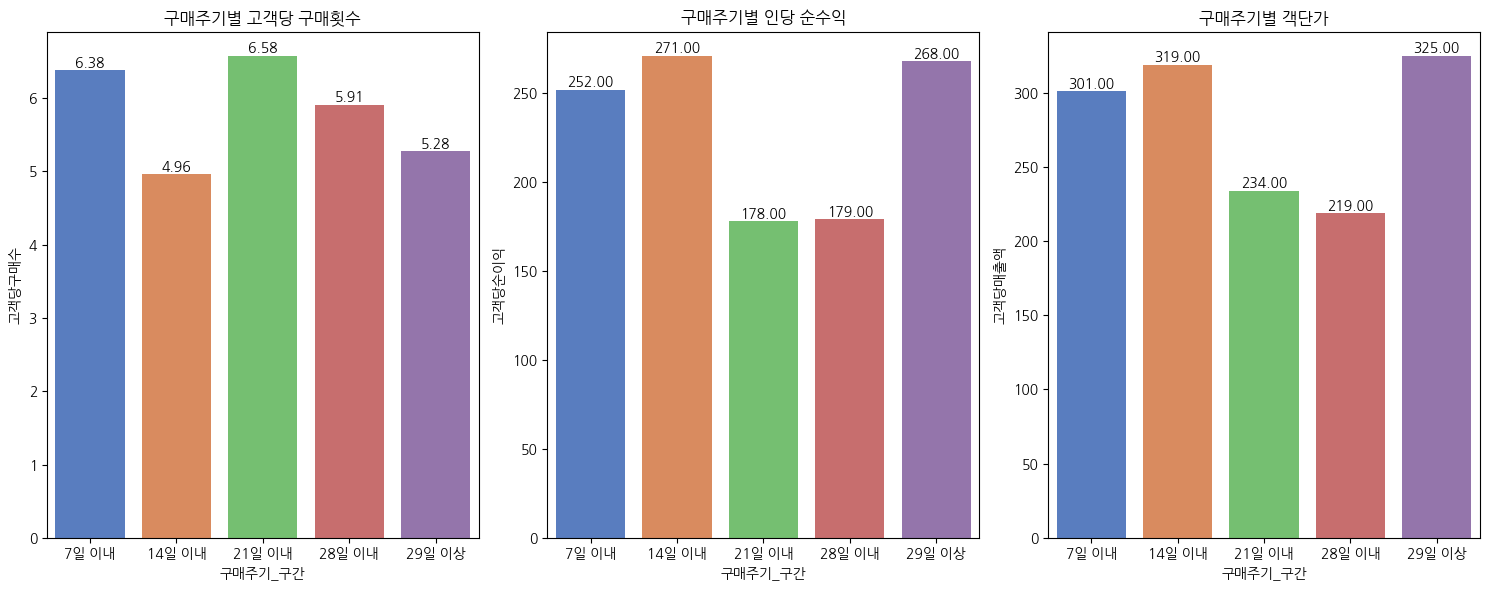

In [221]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))

plt.subplot(1, 3, 1)
sns.barplot(x='구매주기_구간', y='고객당구매수', data=re_df3, palette='muted')
plt.title('구매주기별 고객당 구매횟수')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.subplot(1, 3, 2)
sns.barplot(x='구매주기_구간', y='고객당순이익', data=re_df3, palette='muted')
plt.title('구매주기별 인당 순수익')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.subplot(1, 3, 3)
sns.barplot(x='구매주기_구간', y='고객당매출액', data=re_df3, palette='muted')
plt.title('구매주기별 객단가')
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [220]:
import pickle

with open("./dacon_term2.pkl", "wb") as file:
    pickle.dump(re_df3, file)